In [1]:
# Plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

In [2]:
# Other imports
import networkx as nx
import random

In [3]:
# Generate a series of random graphs
gs = [nx.random_graphs.powerlaw_cluster_graph(n=random.randint(10, 20),
                                             m=random.randint(1, 3),
                                             p=random.random()*0.05)
     for x in range(7)]

In [4]:
# Concatenate then in a single graph
# (there might be a more efficient way)
g = gs[0]
for g1 in gs[1:]:
    i = max(g.nodes()) + 1
    g.add_edges_from([(x+i, y+i) for (x, y) in g1.edges()])

In [5]:
# Calculate nodes and edge properties
# to have something to plot
betw_cent = nx.betweenness.betweenness_centrality(g).values()
edge_betw_cent = nx.edge_betweenness_centrality(g).values()

In [6]:
# Graph layout
graph_pos = nx.layout.fruchterman_reingold_layout(g)

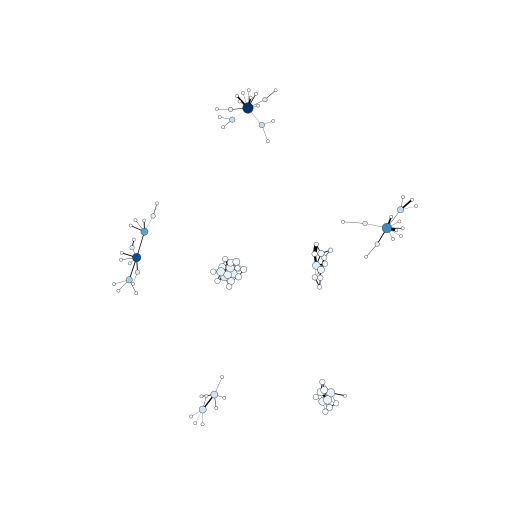

In [7]:
plt.figure(figsize=(9, 9))

# Draw nodes
nx.draw_networkx_nodes(g, graph_pos,
                       # Node size depends on node degree
                       node_size=[x*10 for x in nx.degree(g).values()],
                       # Node color depends on node centrality
                       node_color=betw_cent,
                       cmap=plt.get_cmap('Blues'),
                       vmax=max(betw_cent),
                       vmin=0)
# Draw edges
nx.draw_networkx_edges(g, graph_pos,
                       # Width depends on edge centrality
                       width=[x*250 for x in edge_betw_cent],
                       color='k')
sns.despine(bottom=True, left=True)
plt.xticks([])
plt.yticks([])
pass